In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [3]:
df=pd.read_csv('creditcard.csv')

In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

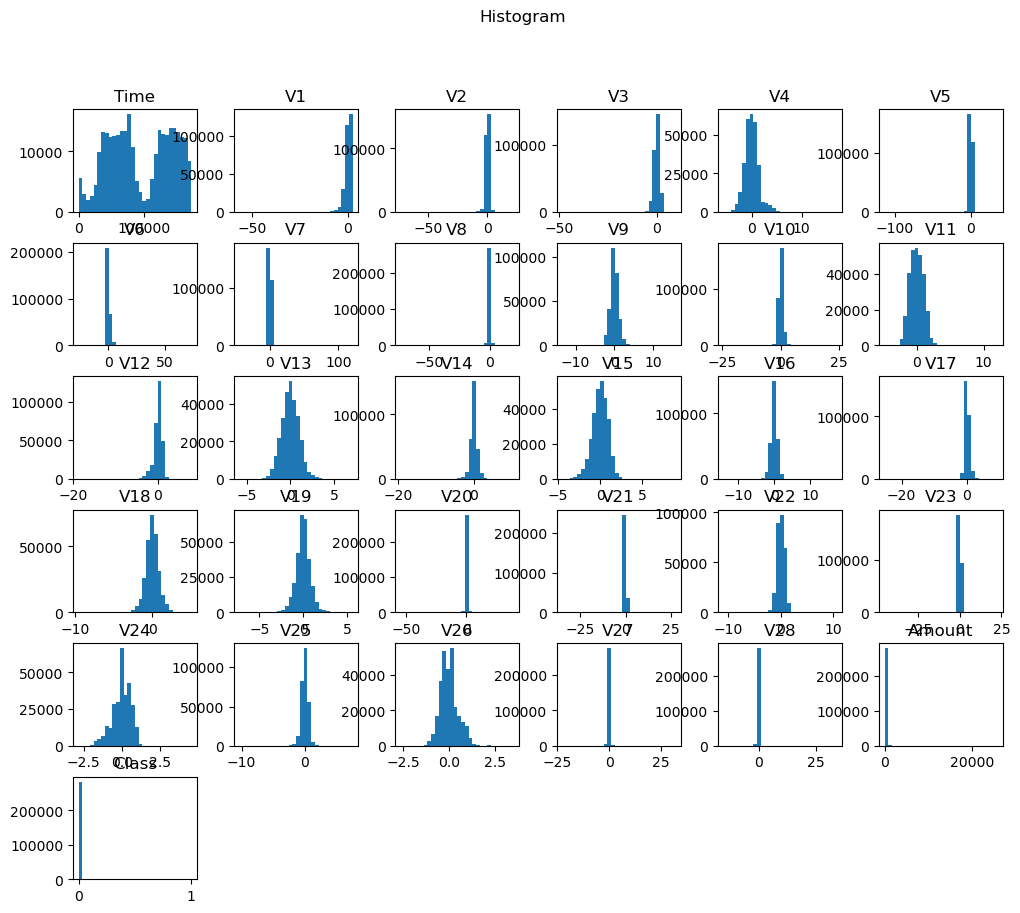

In [6]:
df.hist(bins=30,figsize=(12,10),grid=False)
plt.suptitle('Histogram')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

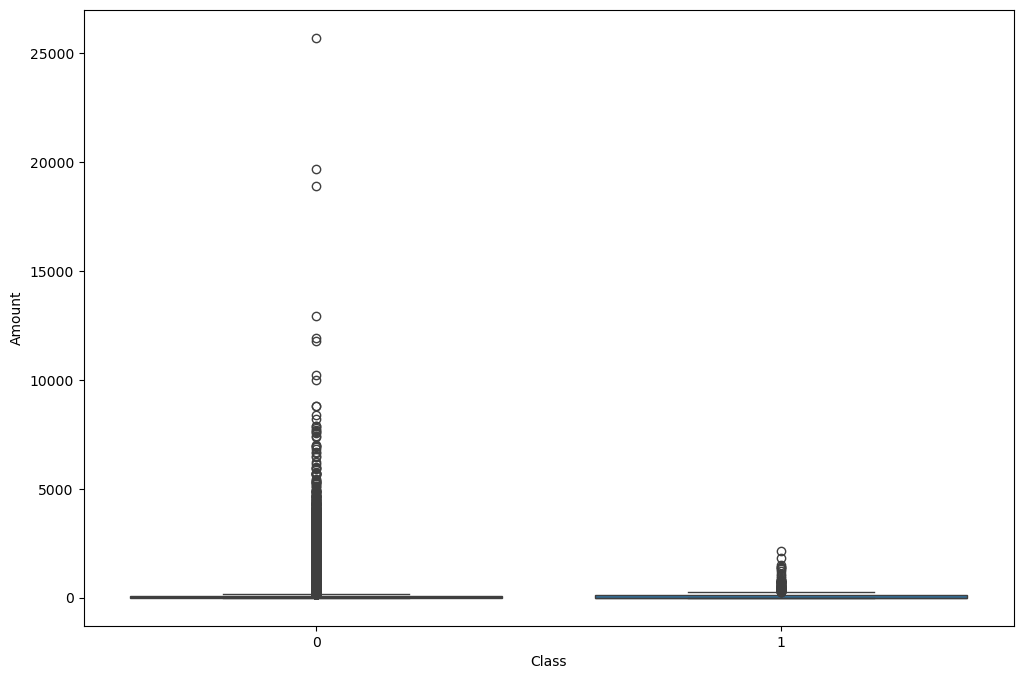

In [7]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Class',y='Amount')
plt.show

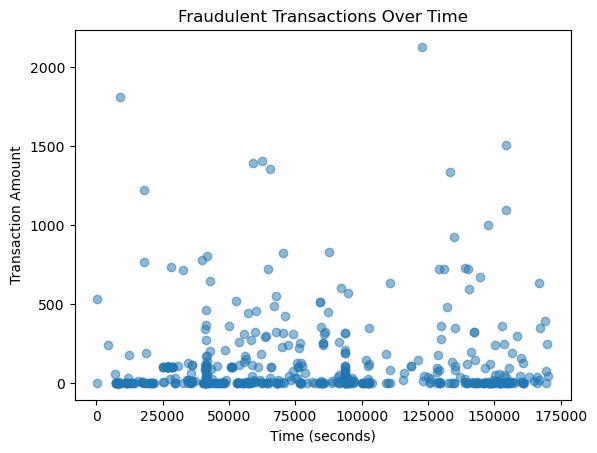

In [8]:
fraud = df[df['Class'] == 1]
plt.scatter(fraud['Time'], fraud['Amount'], alpha=0.5)
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

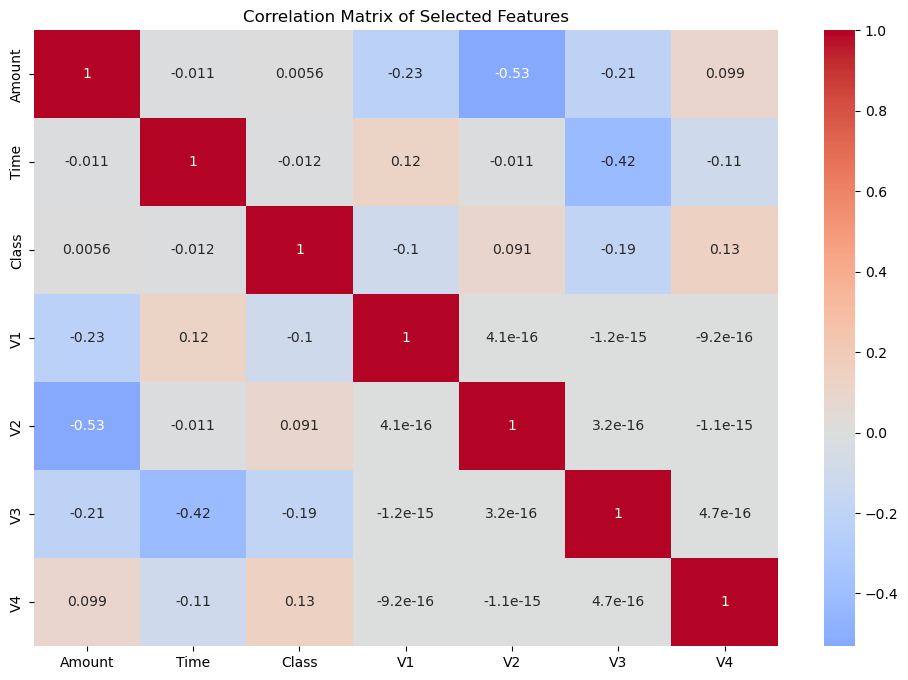

In [9]:
# Correlation matrix for important features
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Amount', 'Time', 'Class'] + [f'V{i}' for i in range(1, 5)]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [14]:
X=df.drop('Class',axis=1)
y=df['Class']

In [15]:
# First split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Then scale your features (fit only on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finally apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [16]:
correlation_matrix = df.corr()
price_correlation = correlation_matrix['Class'].sort_values(ascending=False)
price_correlation

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [17]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [18]:
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [19]:
y_predict=model.predict(X_test_scaled)

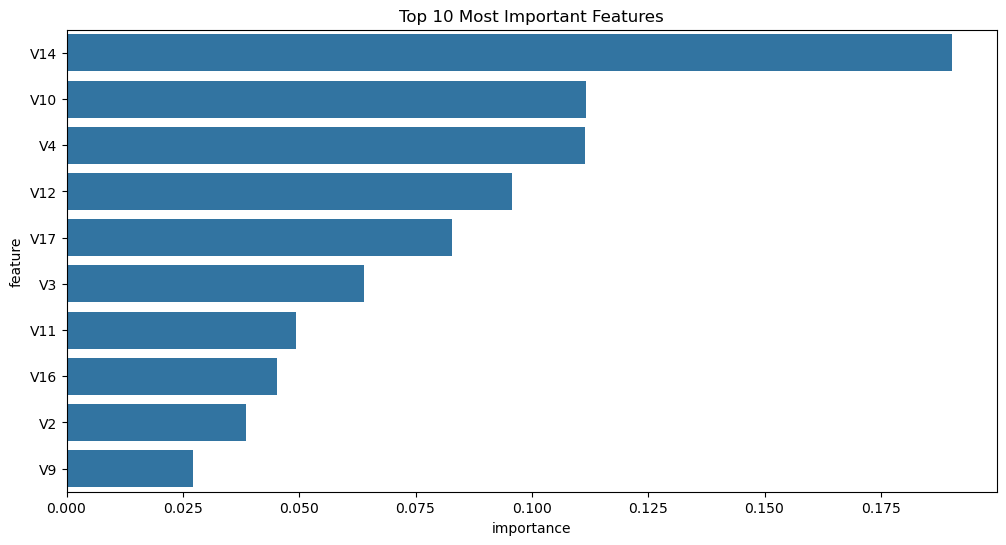

In [36]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,  # Exclude 'Time' and 'Class' columns
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score

# Get predictions and probability scores
y_pred = model.predict(X_test_scaled)
y_scores = model.predict_proba(X_test_scaled)[:, 1]

# 1. Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 2. ROC AUC Score
roc_auc = roc_auc_score(y_test, y_scores)
print(f'\nROC AUC Score: {roc_auc:.3f}')

# 3. Average Precision Score (PR AUC)
ap = average_precision_score(y_test, y_scores)
print(f'Average Precision Score: {ap:.3f}')

# 4. Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962


ROC AUC Score: 0.968
Average Precision Score: 0.872

Confusion Matrix:
[[56852    12]
 [   17    81]]


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# LightGBM
lgb_model = LGBMClassifier(random_state=42)

In [25]:
gb_model.fit(X_train_resampled,y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [26]:
y_predict_gb=gb_model.predict(X_test_scaled)

In [28]:
lgb_model.fit(X_train_resampled,y_train_resampled)
y_predict_lgb=lgb_model.predict(X_test_scaled)

[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [37]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score

# Get predictions and probability scores
y_pred_gb= model.predict(X_test_scaled)
y_scores_gb = model.predict_proba(X_test_scaled)[:, 1]

# 1. Print Classification Report
print("\nClassification Report with Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# 2. ROC AUC Score
roc_auc_gb = roc_auc_score(y_test, y_scores_gb)
print(f'\nROC AUC Score: {roc_auc_gb:.3f}')

# 3. Average Precision Score (PR AUC)
ap_gb = average_precision_score(y_test, y_scores_gb)
print(f'Average Precision Score: {ap_gb:.3f}')

# 4. Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


Classification Report with Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962


ROC AUC Score: 0.968
Average Precision Score: 0.872

Confusion Matrix:
[[56852    12]
 [   17    81]]


In [38]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score

# Get predictions and probability scores
y_pred_lgb= model.predict(X_test_scaled)
y_scores_lgb = model.predict_proba(X_test_scaled)[:, 1]

# 1. Print Classification Report
print("\nClassification Report with Light Gradient Boosting:")
print(classification_report(y_test, y_pred_lgb))

# 2. ROC AUC Score
roc_auc_lgb = roc_auc_score(y_test, y_scores_lgb)
print(f'\nROC AUC Score: {roc_auc_lgb:.3f}')

# 3. Average Precision Score (PR AUC)
ap_lgb = average_precision_score(y_test, y_scores_lgb)
print(f'Average Precision Score: {ap_lgb:.3f}')

# 4. Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))


Classification Report with Light Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962


ROC AUC Score: 0.968
Average Precision Score: 0.872

Confusion Matrix:
[[56852    12]
 [   17    81]]
